<a href="https://colab.research.google.com/github/chinmay250/Traffic-Prediction/blob/main/Traffic_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import datetime
import matplotlib.dates as mdates


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Traffic Prediction/Traffic_prediction/traffic-prediction-dataset.csv")
df

,Cross 1,Cross 2,Cross 3,Cross 4,Cross 5,Cross 6
0,105.0,48.0,30,62.0,31,110.0
1,97.0,41.0,32,55.0,42,103.0
2,76.0,47.0,44,58.0,40,100.0
3,98.0,40.0,39,59.0,43,104.0
4,87.0,41.0,47,49.0,35,112.0
...,...,...,...,...,...,...
16123,85.0,37.0,34,56.0,35,89.0
16124,71.0,45.0,44,50.0,44,53.0
16125,83.0,34.0,34,61.0,44,77.0
16126,89.0,39.0,25,48.0,32,64.0


In [ ]:
## Recplacing spaces in Columns names with '_'

df.columns = df.columns.str.replace(' ', '')

## check the result

df.head()

,Cross1,Cross2,Cross3,Cross4,Cross5,Cross6
0,105.0,48.0,30,62.0,31,110.0
1,97.0,41.0,32,55.0,42,103.0
2,76.0,47.0,44,58.0,40,100.0
3,98.0,40.0,39,59.0,43,104.0
4,87.0,41.0,47,49.0,35,112.0


### **Missing Value Imputation**

In [ ]:
## Replacing all zeros with NaN

for i in df.columns:
    df[i] = df[i].replace(0,np.nan)

for i in df.columns:
    print(f"Number of NaN in {i} is {(df[i].isnull().sum())} ")

Number of NaN in Cross1 is 3615 
Number of NaN in Cross2 is 3473 
Number of NaN in Cross3 is 3952 
Number of NaN in Cross4 is 4060 
Number of NaN in Cross5 is 3947 
Number of NaN in Cross6 is 3986 


In [ ]:
# Moving Average imputations.

count =0
while count<=60:
    df = df.fillna(df.rolling(window=12, min_periods=1).mean())
    count+=1

In [ ]:
df

,Cross1,Cross2,Cross3,Cross4,Cross5,Cross6
0,105.0,48.0,30.0,62.0,31.0,110.0
1,97.0,41.0,32.0,55.0,42.0,103.0
2,76.0,47.0,44.0,58.0,40.0,100.0
3,98.0,40.0,39.0,59.0,43.0,104.0
4,87.0,41.0,47.0,49.0,35.0,112.0
...,...,...,...,...,...,...
16123,85.0,37.0,34.0,56.0,35.0,89.0
16124,71.0,45.0,44.0,50.0,44.0,53.0
16125,83.0,34.0,34.0,61.0,44.0,77.0
16126,89.0,39.0,25.0,48.0,32.0,64.0


In [ ]:

# data_col = pd.date_range(start='2023-01-01 00:00:00',periods=df.shape[0], freq='300s')
# data_col = pd.DataFrame({"Date":data_col})
# df = pd.concat([data_col,df],axis=1)
# df.head()

,Date,Cross1,Cross2,Cross3,Cross4,Cross5,Cross6
0,2023-01-01 00:00:00,105.0,48.0,30.0,62.0,31.0,110.0
1,2023-01-01 00:05:00,97.0,41.0,32.0,55.0,42.0,103.0
2,2023-01-01 00:10:00,76.0,47.0,44.0,58.0,40.0,100.0
3,2023-01-01 00:15:00,98.0,40.0,39.0,59.0,43.0,104.0
4,2023-01-01 00:20:00,87.0,41.0,47.0,49.0,35.0,112.0


In [ ]:
# df = df.groupby(pd.Grouper(key='Date', axis=1,
#                       freq='H', sort=True)).sum()

In [ ]:
# df['Total'] = df.iloc[:,:].sum(axis=1)
# df['Average'] = df['Total']/6
# df

,Cross1,Cross2,Cross3,Cross4,Cross5,Cross6,Total,Average
Date,,,,,,,,
2023-01-01 00:00:00,990.0,486.0,380.0,643.0,373.0,1061.0,3933.0,655.500000
2023-01-01 01:00:00,511.0,236.0,203.0,372.0,199.0,579.0,2100.0,350.000000
2023-01-01 02:00:00,306.0,152.0,110.0,252.0,100.0,335.0,1255.0,209.166667
2023-01-01 03:00:00,184.0,71.0,70.0,136.0,67.0,225.0,753.0,125.500000
2023-01-01 04:00:00,210.0,69.0,71.0,124.0,57.0,218.0,749.0,124.833333
...,...,...,...,...,...,...,...,...
2023-02-25 19:00:00,2279.0,1399.0,960.0,1858.0,937.0,1660.0,9093.0,1515.500000
2023-02-25 20:00:00,2298.0,1291.0,910.0,1797.0,876.0,1472.0,8644.0,1440.666667
2023-02-25 21:00:00,2124.0,1068.0,869.0,1617.0,954.0,1395.0,8027.0,1337.833333


In [ ]:
# df = df.round({'Total': 0, 'Average': 1})

In [ ]:
# df.reset_index(drop =False,inplace =True)
# df

,Date,Cross1,Cross2,Cross3,Cross4,Cross5,Cross6,Total,Average
0,2023-01-01 00:00:00,990.0,486.0,380.0,643.0,373.0,1061.0,3933.0,655.5
1,2023-01-01 01:00:00,511.0,236.0,203.0,372.0,199.0,579.0,2100.0,350.0
2,2023-01-01 02:00:00,306.0,152.0,110.0,252.0,100.0,335.0,1255.0,209.2
3,2023-01-01 03:00:00,184.0,71.0,70.0,136.0,67.0,225.0,753.0,125.5
4,2023-01-01 04:00:00,210.0,69.0,71.0,124.0,57.0,218.0,749.0,124.8
...,...,...,...,...,...,...,...,...,...
1339,2023-02-25 19:00:00,2279.0,1399.0,960.0,1858.0,937.0,1660.0,9093.0,1515.5
1340,2023-02-25 20:00:00,2298.0,1291.0,910.0,1797.0,876.0,1472.0,8644.0,1440.7
1341,2023-02-25 21:00:00,2124.0,1068.0,869.0,1617.0,954.0,1395.0,8027.0,1337.8
1342,2023-02-25 22:00:00,1496.0,734.0,717.0,1196.0,727.0,1218.0,6088.0,1014.7


In [ ]:
# df.to_csv("/content/drive/MyDrive/Traffic_Prediction_hourly.csv")

### **Create Data**

In [ ]:
def create_cross_data(dataset,column):
    df = dataset[column]

    #converting it into np.array
    df = (np.array(df).reshape(-1,1))

    # splitting into training and testing
    train_size = int(len(df)*0.75)
    test_size = len(df) - train_size
    train_data , test_data = df[0:train_size,:], df[train_size:len(df),:1]

    ## Converting Arrays of Values in Dataset matrix

    def create_dataset(dataset, time_steps=1):
        dataX , dataY = [], []
        for i in range(len(dataset)-time_steps-1):
            a = dataset[i:(i+time_steps), 0]
            dataX.append(a)
            dataY.append(dataset[i+time_steps,0])

        return np.array(dataX), np.array(dataY)

    ## Creating 13 elements record.
    time_step = 12
    x_train, y_train = create_dataset(train_data, time_step )
    x_test, y_test = create_dataset(test_data,time_step )

    # train
    train_x = pd.DataFrame(x_train, columns =['A', 'B', 'C','D','E','F','G','H','I','J','k','L'])
    train_y = pd.DataFrame(y_train, columns =['output'])
    train = pd.concat([train_x,train_y],axis =1)

    # test
    test_x = pd.DataFrame(x_test, columns =['A', 'B', 'C','D','E','F','G','H','I','J','k','L'])
    test_y = pd.DataFrame(y_test, columns =['output'])
    test = pd.concat([test_x,test_y],axis =1)

    # returning the train and test dataframes
    return train,test




In [ ]:
def algorithmsApply(train,test,column_name,last_days):

    # days for predictions.
    dday = -int(last_days * 288)

    ## Scaling the train and test data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    #giving the columns for iteration
    col_ =[train.columns[:-1]]
    #scaling the columns
    for i in col_:
        train[i] = scaler.fit_transform(train[i])
        test[i] = scaler.fit_transform(test[i])



    #Spliting the train test
    x_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
    x_test, y_test = test.iloc[:,:-1],test.iloc[:,-1]

    ## Algorithms for Regression
    from sklearn.neural_network import MLPRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import SGDRegressor
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

    names = ['Linear Regression','Gradient Boosting'
             ,'MLP-NeuralNetwork','Random Forest','Stochastic Desent']
    models : str =  [LinearRegression(),GradientBoostingRegressor()
            ,MLPRegressor(),RandomForestRegressor(),SGDRegressor()]
    mae = []
    pred_models = []
    mse = []
    rmse = []
    r = []
    exp_var = []

    print("\n\t\tModel Training\n")
    for mod in models:
        model = mod
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        mae.append(mean_absolute_error(y_test,y_pred))
        mse.append(mean_squared_error(y_test,y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
        r2 = r2_score(y_test,y_pred)
        r.append(r2)
        exp_var.append(explained_variance_score(y_test, y_pred))
        pred_models.append(y_pred)
        # print("\n")
        # print("\tDone -->> ",mod)
    print('---'*20)
    print("\n\n")


    print("\t\tModel Results\n")
    model_result = pd.DataFrame({"Model_Name":names,
                             "MAE":mae,
                             "RMSE":rmse,
                             "R-Square":r,
                             "EV Score":exp_var}).sort_values(by='R-Square',ascending = False)
    model_result.reset_index(drop =True,inplace =True)


    # Adding the Datefactor
    date_val = pd.date_range(start='2023-01-01 00:00:00',periods=df.shape[0], freq='300s')



    # Plotting the Graph for last 288 points which is equal to one day.
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    ax.plot(date_val[dday:],y_test.values[dday:],label = 'True Values',linewidth = 1)
    for i in range(len(pred_models)):
        y_hat = pred_models[i]
        y_act = y_test.values
        ax.plot(date_val[dday:],y_hat[dday:],label = names[i],linewidth=1)

    ax.set_xlabel("Time")
    ax.set_ylabel("Flow")
    ax.set_title(column_name)
    ax.legend(loc = 'upper left',title='Models',fontsize = 'large')
    ax.set_xticklabels(date_val[dday:], rotation=30, ha='right')
    fmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)

    plt.show()
    print("\n")
    return model_result







### **Modeling**

#### **Cross1**

##### **Day**


		Model Training

------------------------------------------------------------



		Model Results



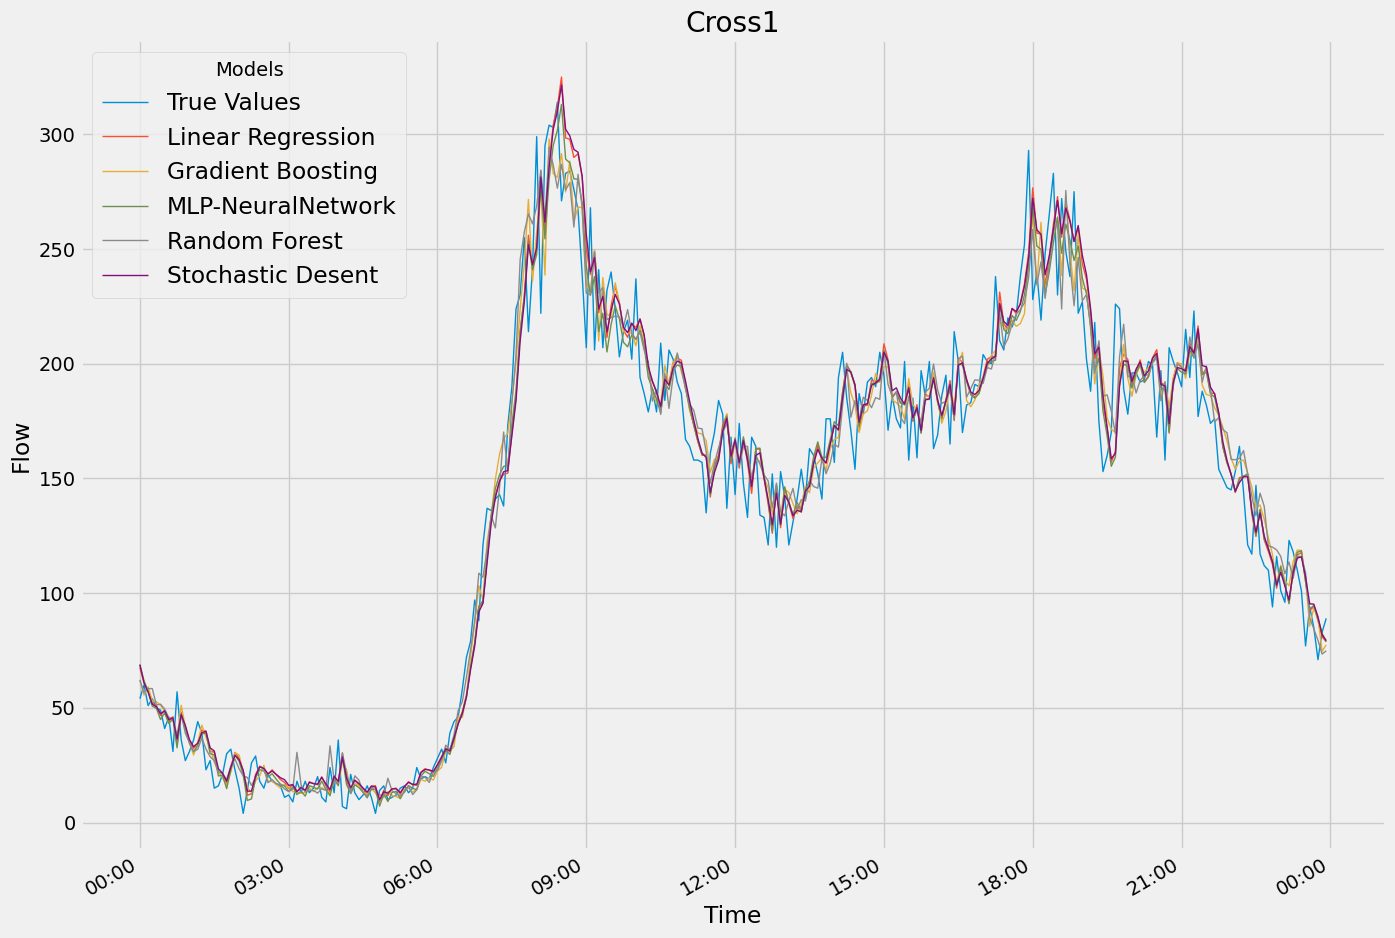

,Model_Name,MAE,RMSE,R-Square,EV Score
0,Gradient Boosting,13.408160,18.729825,0.944082,0.945166
1,MLP-NeuralNetwork,13.528792,18.748387,0.943972,0.944486
2,Random Forest,13.652017,19.123275,0.941709,0.943109
3,Stochastic Desent,13.897193,19.289486,0.940691,0.942217
4,Linear Regression,13.926986,19.321788,0.940492,0.941963


In [ ]:
train1,test1 = create_cross_data(df,'Cross1')
algorithmsApply(train1,test1,'Cross1',1)

 MAE - mean absolute error which gives absolute difference between actual and predicted values.

 MSE - square error which gives the squared difference between actual and predicted value.

 RootMSE - root mean squared error gives the root of mse

 R-squared - R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. more is better

 1 - SSr/SSm



##### **Week**


		Model Training

------------------------------------------------------------



		Model Results



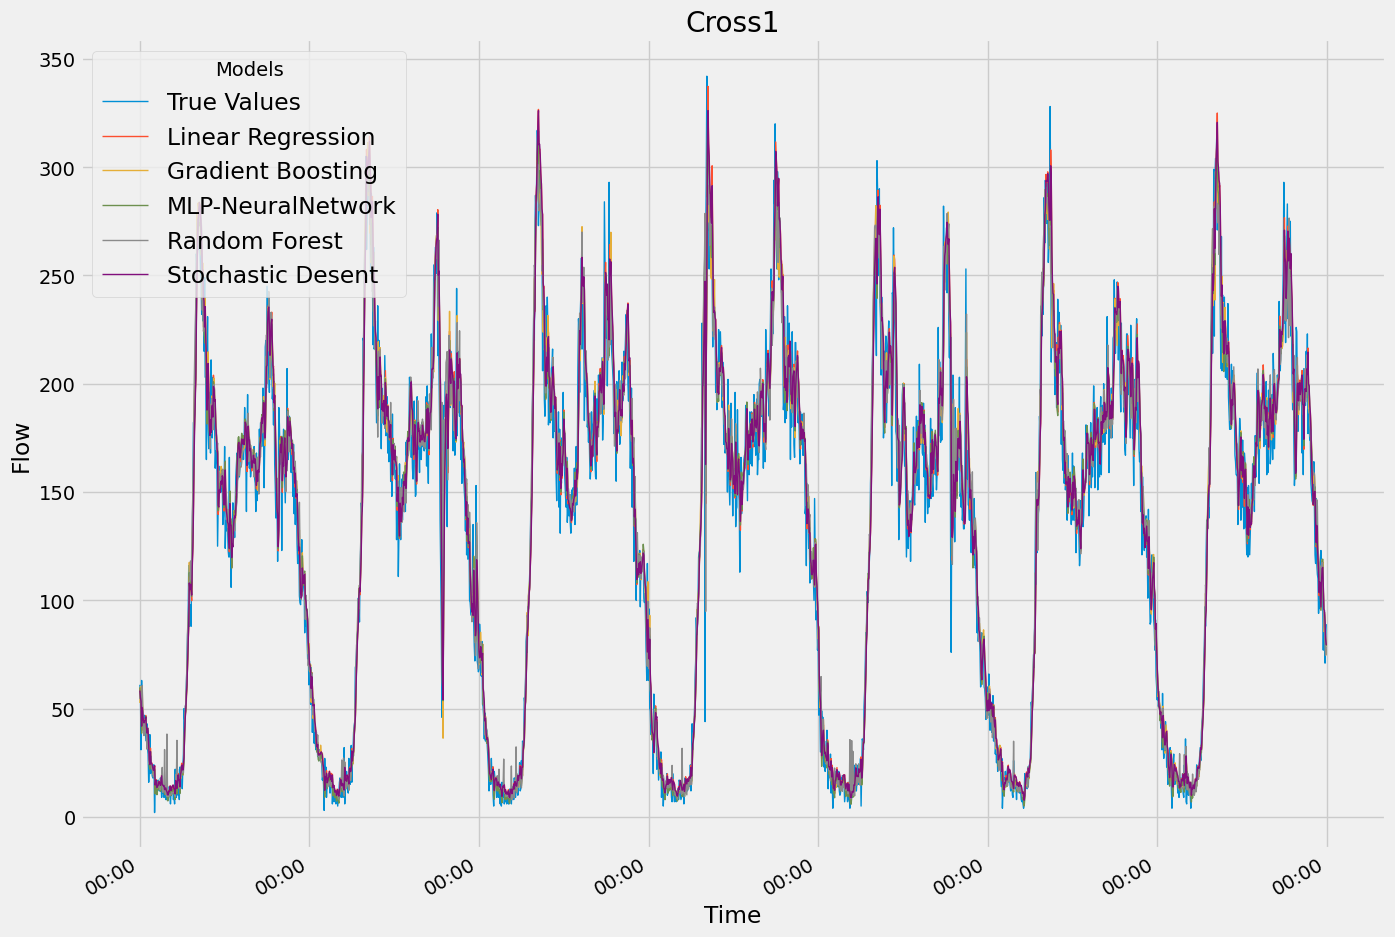

,Model_Name,MAE,RMSE,R-Square,EV Score
0,Gradient Boosting,13.399459,18.674599,0.944412,0.945503
1,MLP-NeuralNetwork,13.570478,18.795585,0.943689,0.944352
2,Random Forest,13.632940,19.176367,0.941384,0.942749
3,Stochastic Desent,13.873116,19.271803,0.940800,0.942162
4,Linear Regression,13.926986,19.321788,0.940492,0.941963


In [ ]:
train1,test1 = create_cross_data(df,'Cross1')
algorithmsApply(train1,test1,'Cross1',7)

#### **Cross2**

##### **Day**


		Model Training

------------------------------------------------------------



		Model Results



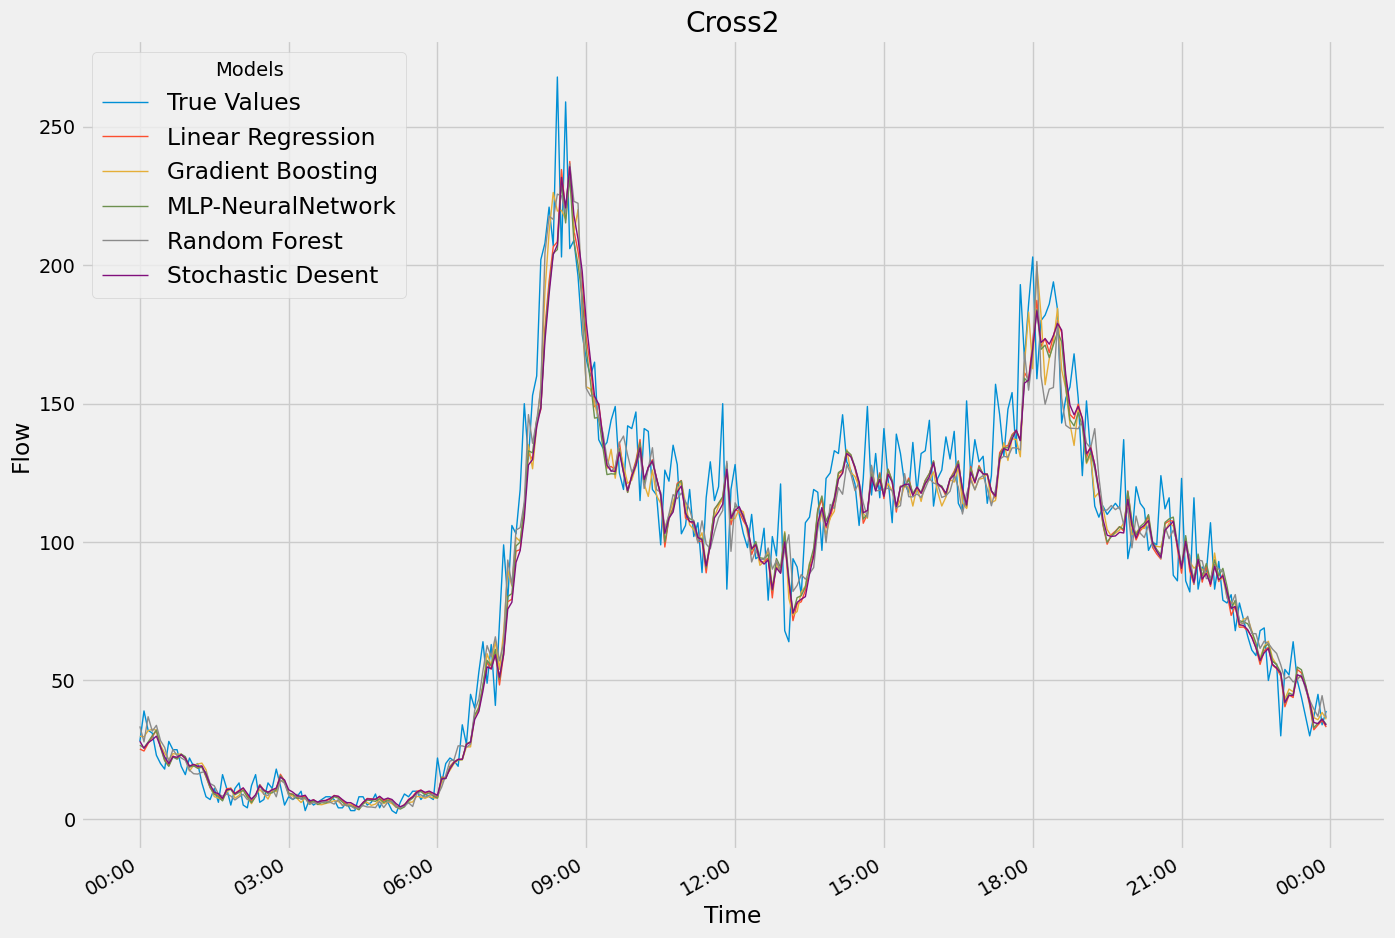

,Model_Name,MAE,MSE,R-Square,EV Score
0,Gradient Boosting,10.878197,253.175854,0.919913,0.923982
1,Random Forest,10.939797,256.715719,0.918793,0.922973
2,MLP-NeuralNetwork,10.943921,259.261907,0.917987,0.921523
3,Linear Regression,11.128245,267.231397,0.915466,0.919648
4,Stochastic Desent,11.108202,269.250108,0.914828,0.919035


In [ ]:
train2,test2 = create_cross_data(df,'Cross2')
algorithmsApply(train2,test2,'Cross2',1)

##### **Week**


		Model Training

------------------------------------------------------------



		Model Results



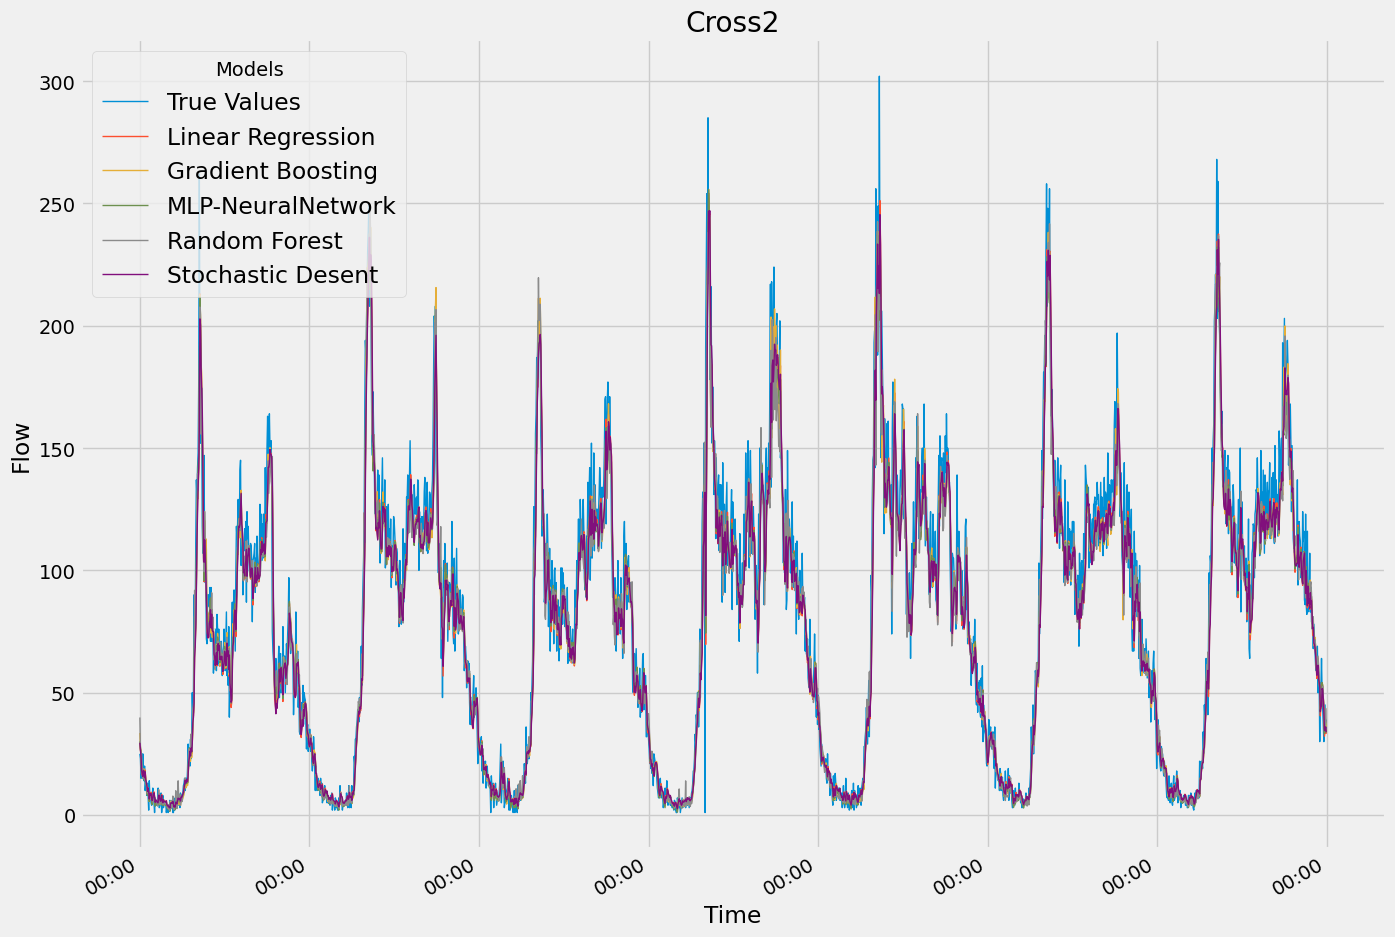

,Model_Name,MAE,MSE,R-Square,EV Score
0,Gradient Boosting,10.877665,253.430257,0.919832,0.923925
1,Random Forest,10.898999,254.649798,0.919446,0.923436
2,MLP-NeuralNetwork,10.918325,257.318722,0.918602,0.922917
3,Linear Regression,11.128245,267.231397,0.915466,0.919648
4,Stochastic Desent,11.145892,271.606167,0.914082,0.918615


In [ ]:
train2,test2 = create_cross_data(df,'Cross2')
algorithmsApply(train2,test2,'Cross2',7)

#### **Cross3**

##### **Day**


		Model Training

------------------------------------------------------------



		Model Results



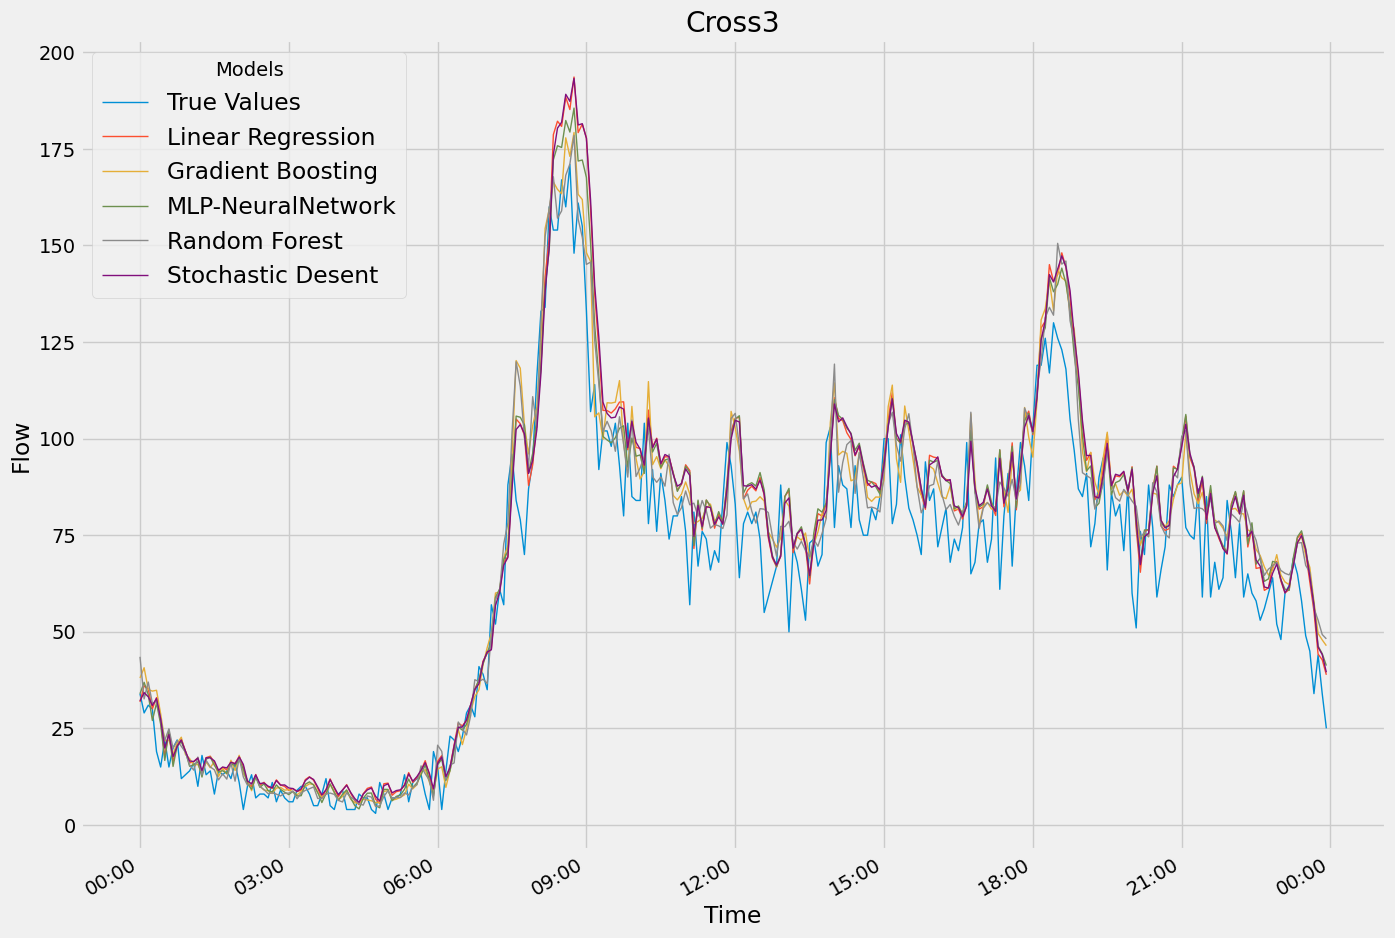

,Model_Name,MAE,MSE,R-Square,EV Score
0,Random Forest,9.308575,163.475984,0.883801,0.913959
1,Gradient Boosting,9.421118,166.130432,0.881914,0.913881
2,MLP-NeuralNetwork,10.082689,183.678635,0.869441,0.908577
3,Stochastic Desent,10.372303,200.391522,0.857562,0.902226
4,Linear Regression,10.464174,204.422452,0.854696,0.899509


In [ ]:
train3,test3 = create_cross_data(df,'Cross3')
algorithmsApply(train3,test3,'Cross3',1)

##### **Week**


		Model Training

------------------------------------------------------------



		Model Results



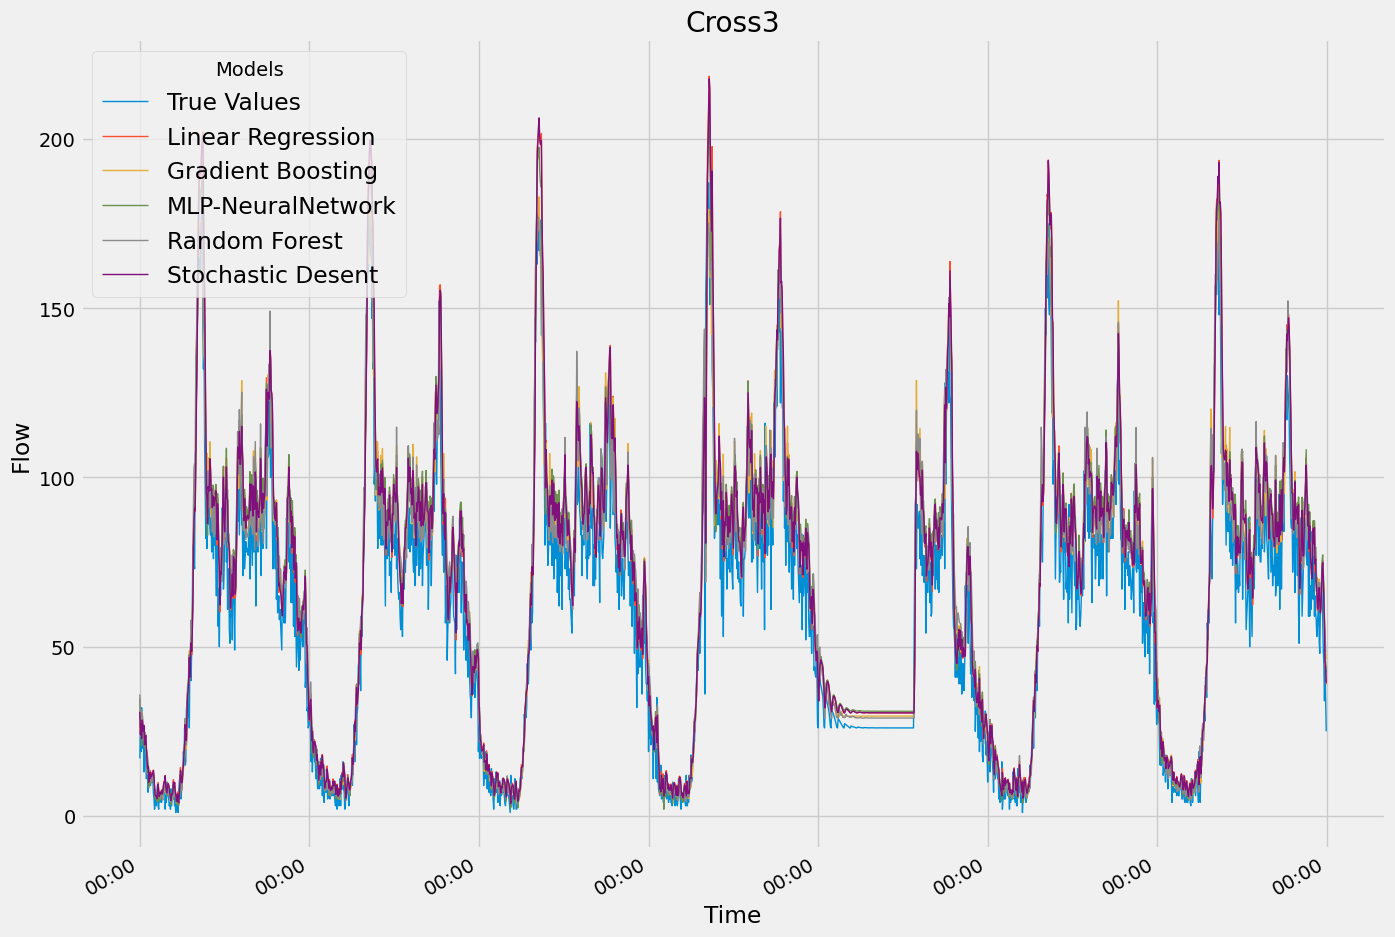

,Model_Name,MAE,MSE,R-Square,EV Score
0,Random Forest,9.336778,162.878776,0.884226,0.914449
1,Gradient Boosting,9.412770,165.839300,0.882121,0.913782
2,Stochastic Desent,10.282936,197.624891,0.859528,0.902523
3,MLP-NeuralNetwork,10.652586,201.855634,0.856521,0.906304
4,Linear Regression,10.464174,204.422452,0.854696,0.899509


In [ ]:
train3,test3 = create_cross_data(df,'Cross3')
algorithmsApply(train3,test3,'Cross3',7)

#### **Cross4**

##### **Day**


		Model Training

------------------------------------------------------------



		Model Results



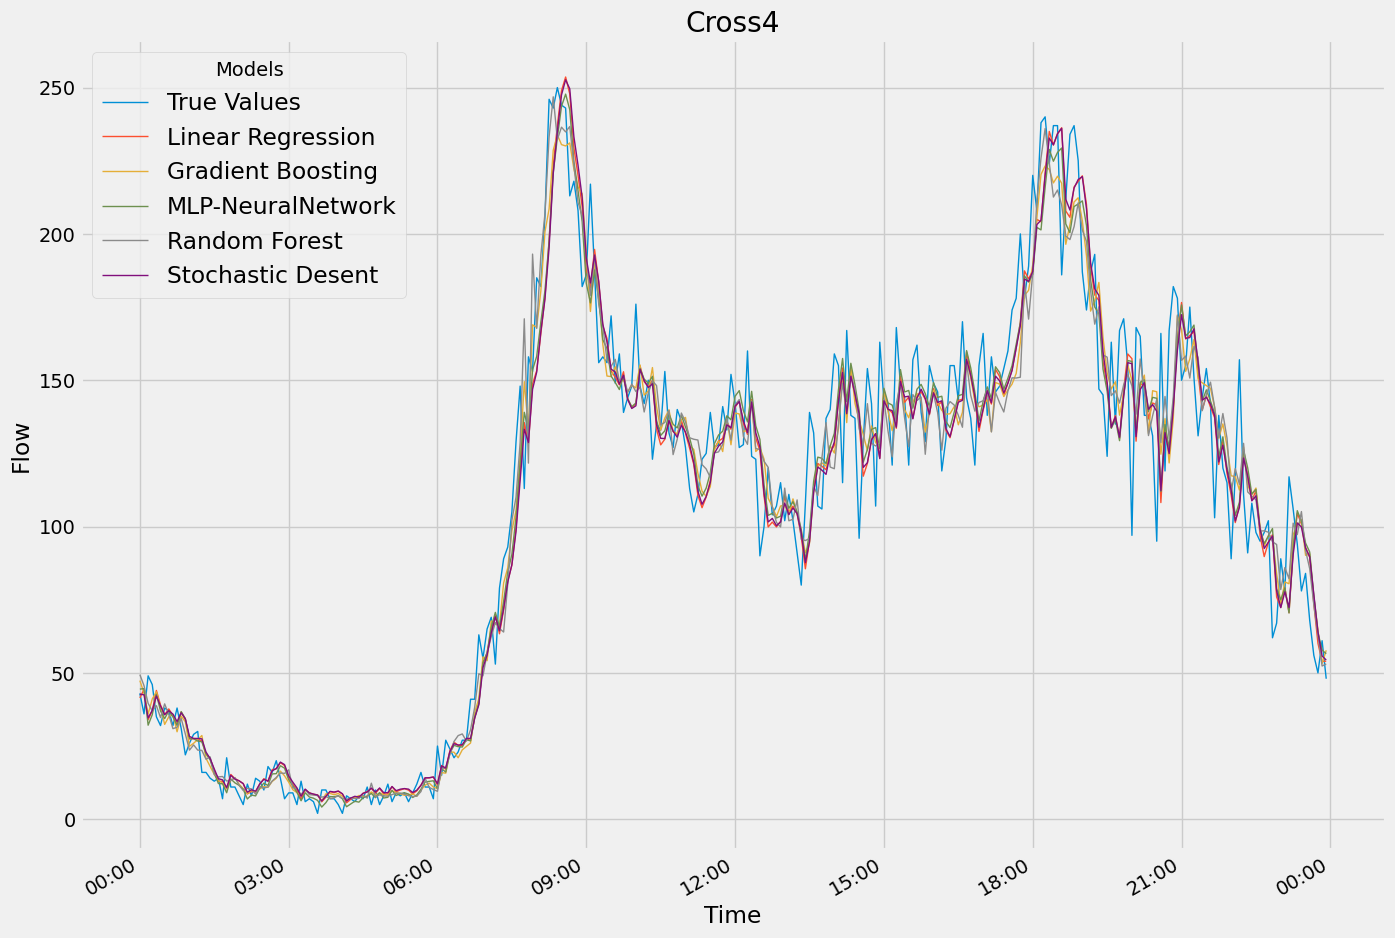

,Model_Name,MAE,MSE,R-Square,EV Score
0,Gradient Boosting,12.592813,325.504215,0.920577,0.920687
1,Random Forest,12.607317,332.543613,0.918860,0.918905
2,MLP-NeuralNetwork,12.910527,338.478528,0.917411,0.917480
3,Stochastic Desent,13.158710,350.281337,0.914532,0.914823
4,Linear Regression,13.170497,350.341117,0.914517,0.914865


In [ ]:
train4,test4 = create_cross_data(df,'Cross4')
algorithmsApply(train4,test4,'Cross4',1)

##### **Week**


		Model Training

------------------------------------------------------------



		Model Results



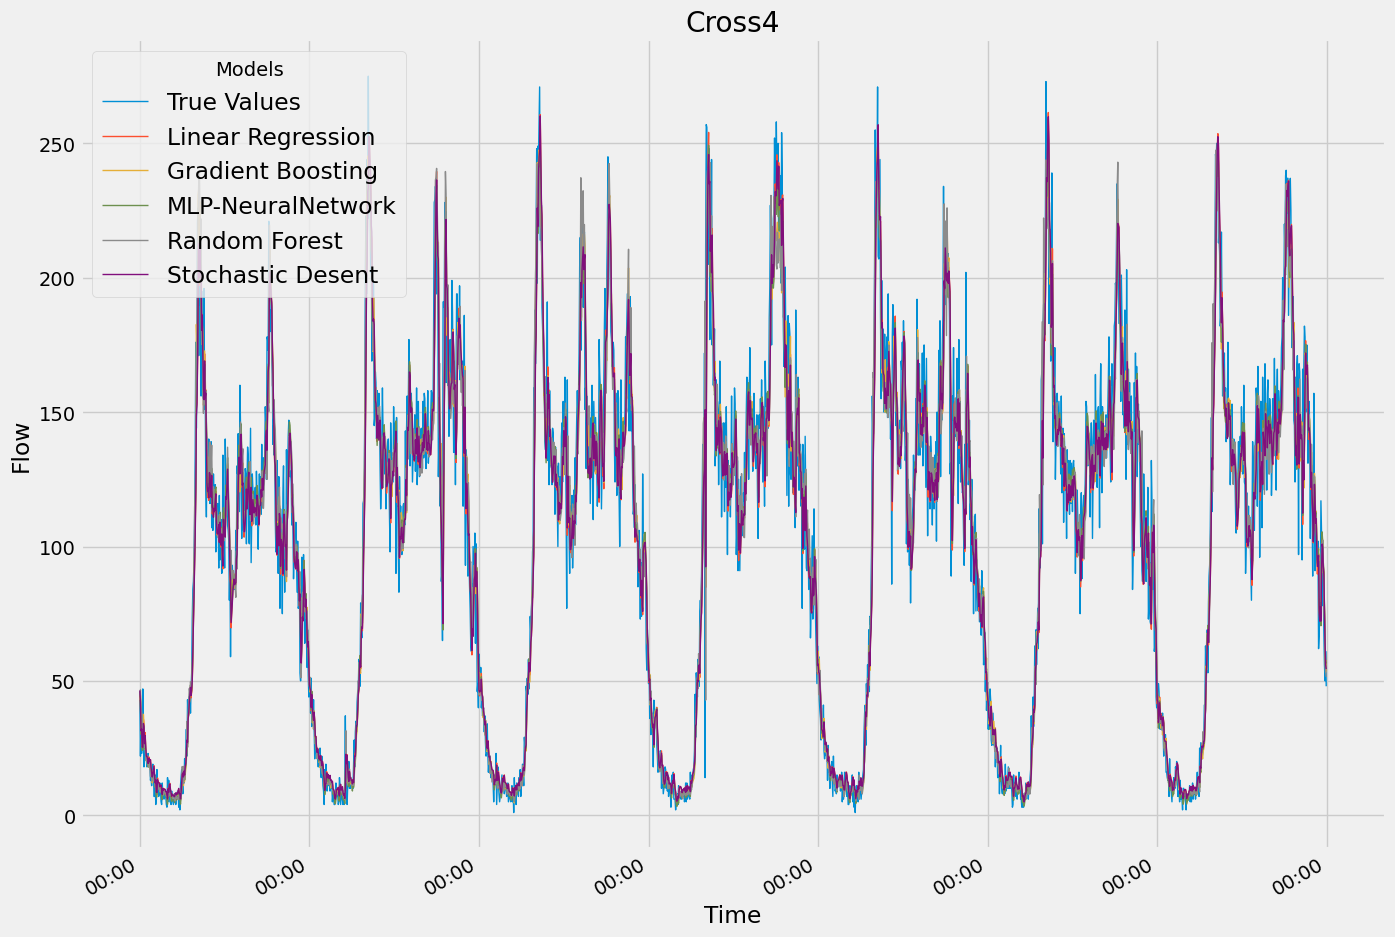

,Model_Name,MAE,MSE,R-Square,EV Score
0,Gradient Boosting,12.595950,325.567709,0.920562,0.920671
1,Random Forest,12.624526,333.839963,0.918543,0.918580
2,MLP-NeuralNetwork,12.910901,338.953569,0.917296,0.917437
3,Linear Regression,13.170497,350.341117,0.914517,0.914865
4,Stochastic Desent,13.162536,350.710073,0.914427,0.914775


In [ ]:
train4,test4 = create_cross_data(df,'Cross4')
algorithmsApply(train4,test4,'Cross4',7)

#### **Cross5**

##### **Day**


		Model Training

------------------------------------------------------------



		Model Results



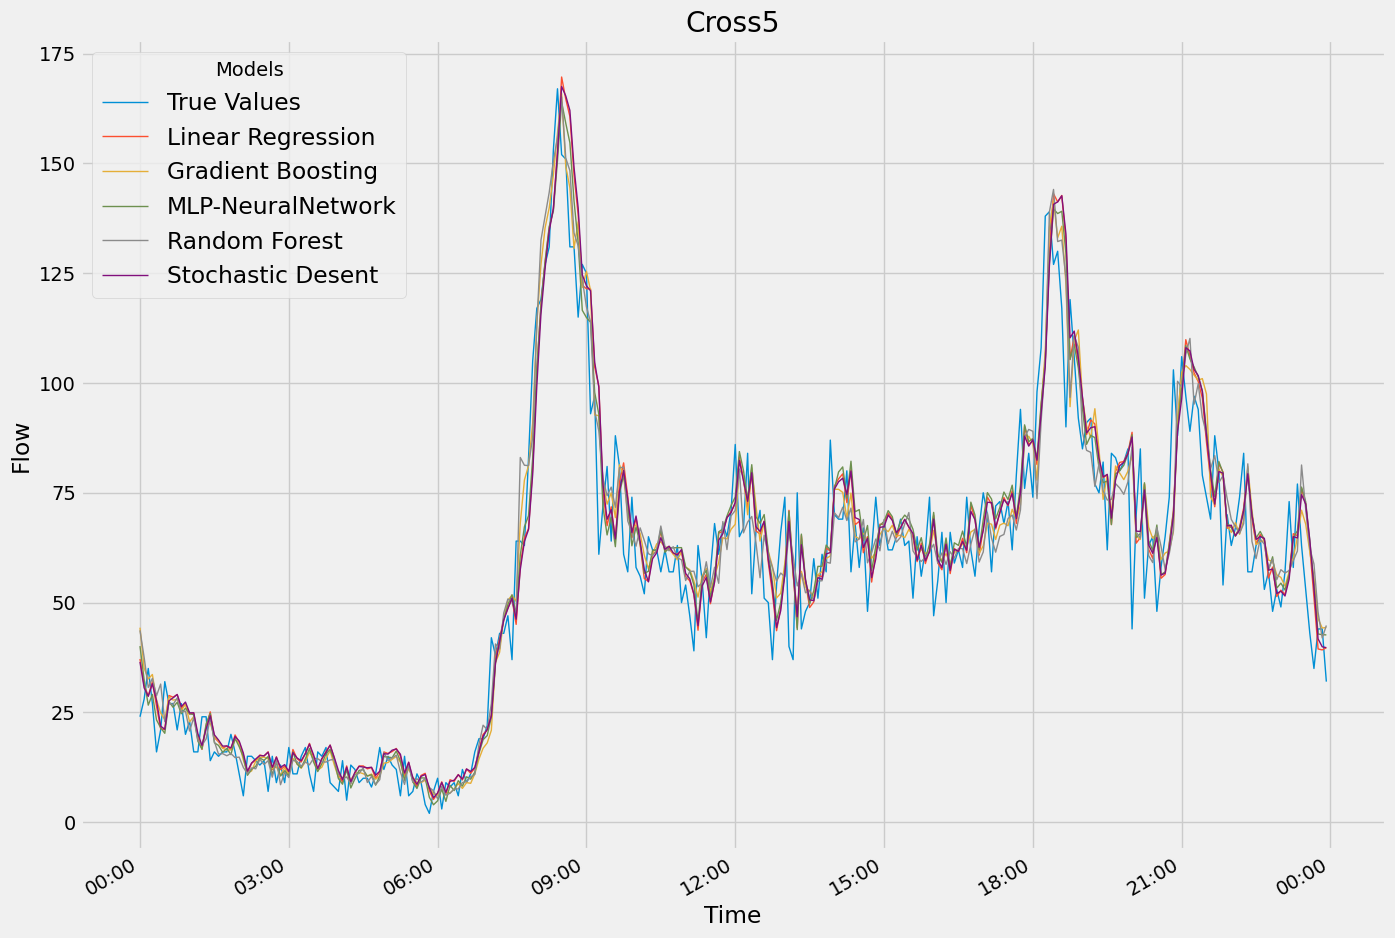

,Model_Name,MAE,MSE,R-Square,EV Score
0,Gradient Boosting,7.792320,118.202629,0.899449,0.902024
1,Random Forest,7.853840,121.681790,0.896489,0.899378
2,MLP-NeuralNetwork,8.280895,130.882243,0.888663,0.892360
3,Stochastic Desent,8.374865,137.778263,0.882797,0.887196
4,Linear Regression,8.424405,138.809153,0.881920,0.886143


In [ ]:
train5,test5 = create_cross_data(df,'Cross5')
algorithmsApply(train5,test5,'Cross5',1)

##### **Week**


		Model Training

------------------------------------------------------------



		Model Results



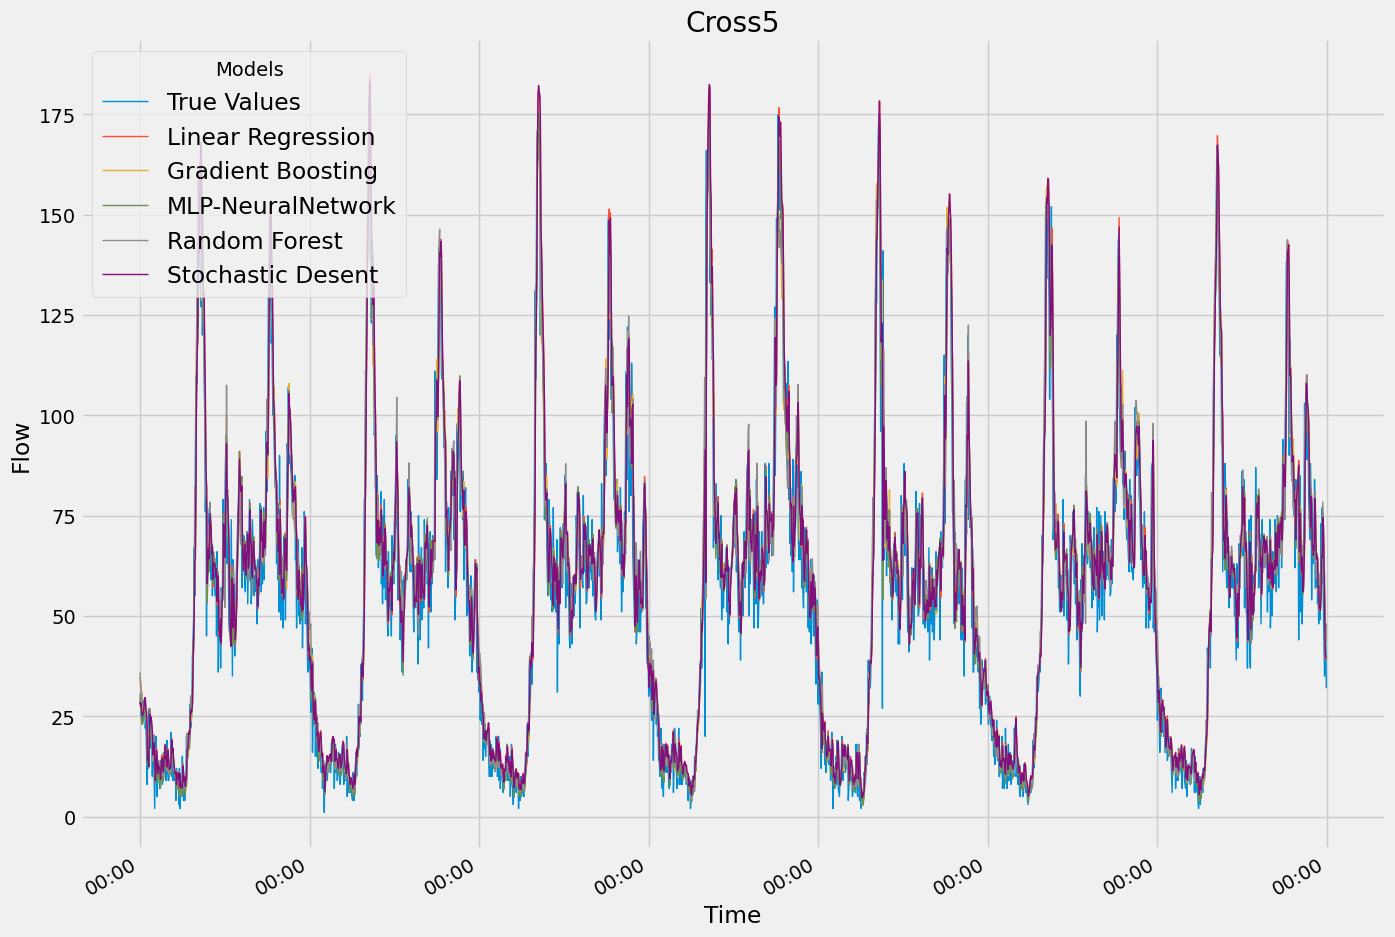

,Model_Name,MAE,MSE,R-Square,EV Score
0,Gradient Boosting,7.788535,118.151084,0.899493,0.902093
1,Random Forest,7.792185,120.505505,0.897490,0.900221
2,MLP-NeuralNetwork,8.166181,128.131616,0.891003,0.892814
3,Stochastic Desent,8.342617,137.020206,0.883442,0.887348
4,Linear Regression,8.424405,138.809153,0.881920,0.886143


In [ ]:
train5,test5 = create_cross_data(df,'Cross5')
algorithmsApply(train5,test5,'Cross5',7)

#### **Cross6**

##### **Day**


		Model Training

------------------------------------------------------------



		Model Results



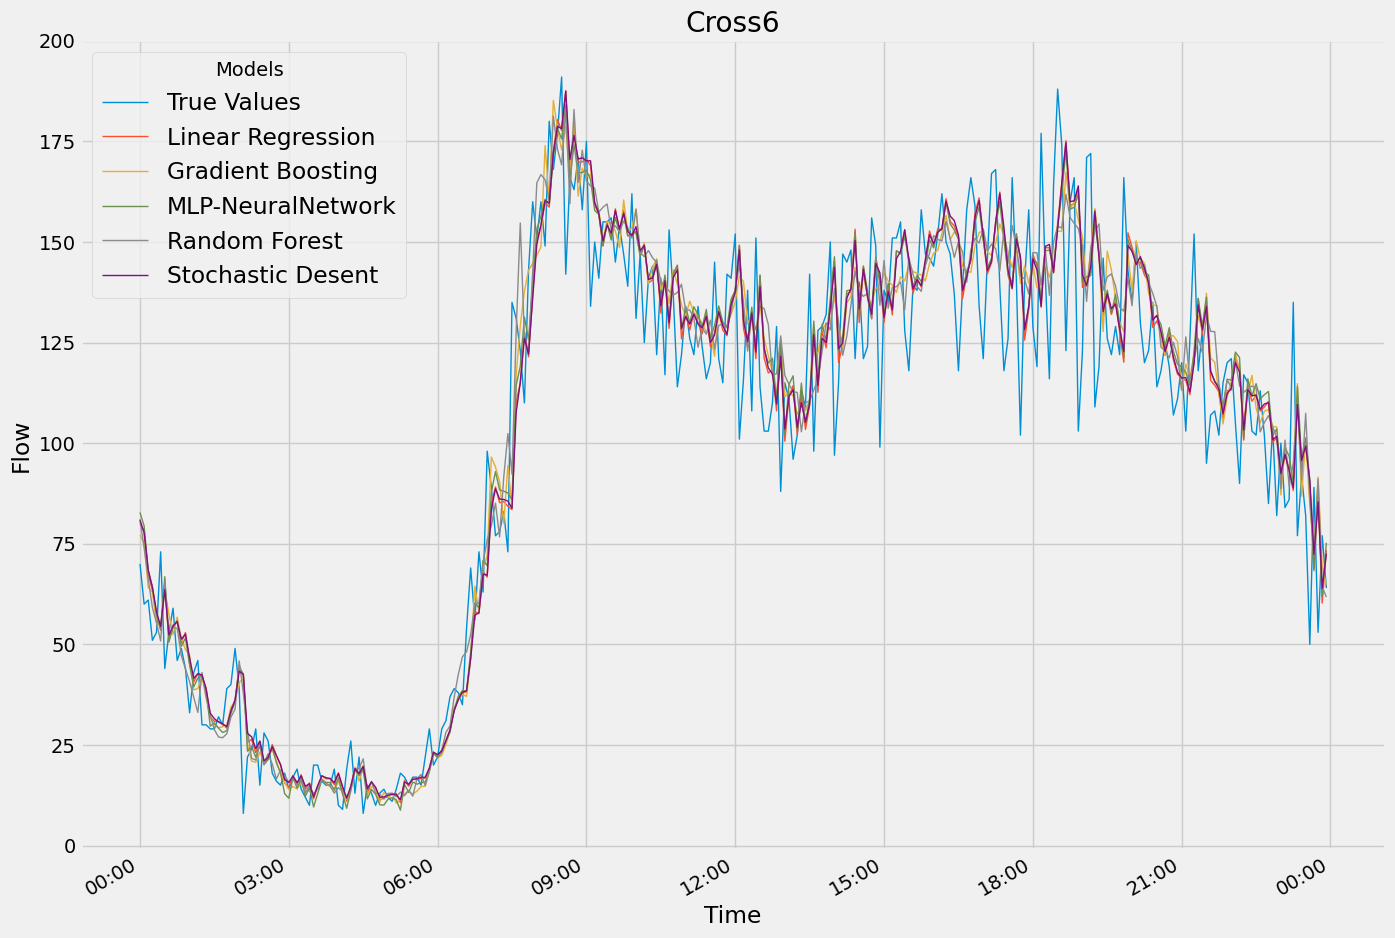

,Model_Name,MAE,MSE,R-Square,EV Score
0,Random Forest,12.523154,295.138543,0.910832,0.912322
1,Gradient Boosting,12.573478,295.665501,0.910673,0.912115
2,MLP-NeuralNetwork,12.868586,306.998382,0.907249,0.909306
3,Stochastic Desent,13.041046,321.683277,0.902813,0.905973
4,Linear Regression,13.081342,324.187515,0.902056,0.904709


In [ ]:
train6,test6 = create_cross_data(df,'Cross6')
algorithmsApply(train6,test6,'Cross6',1)

##### **Week**


		Model Training

------------------------------------------------------------



		Model Results



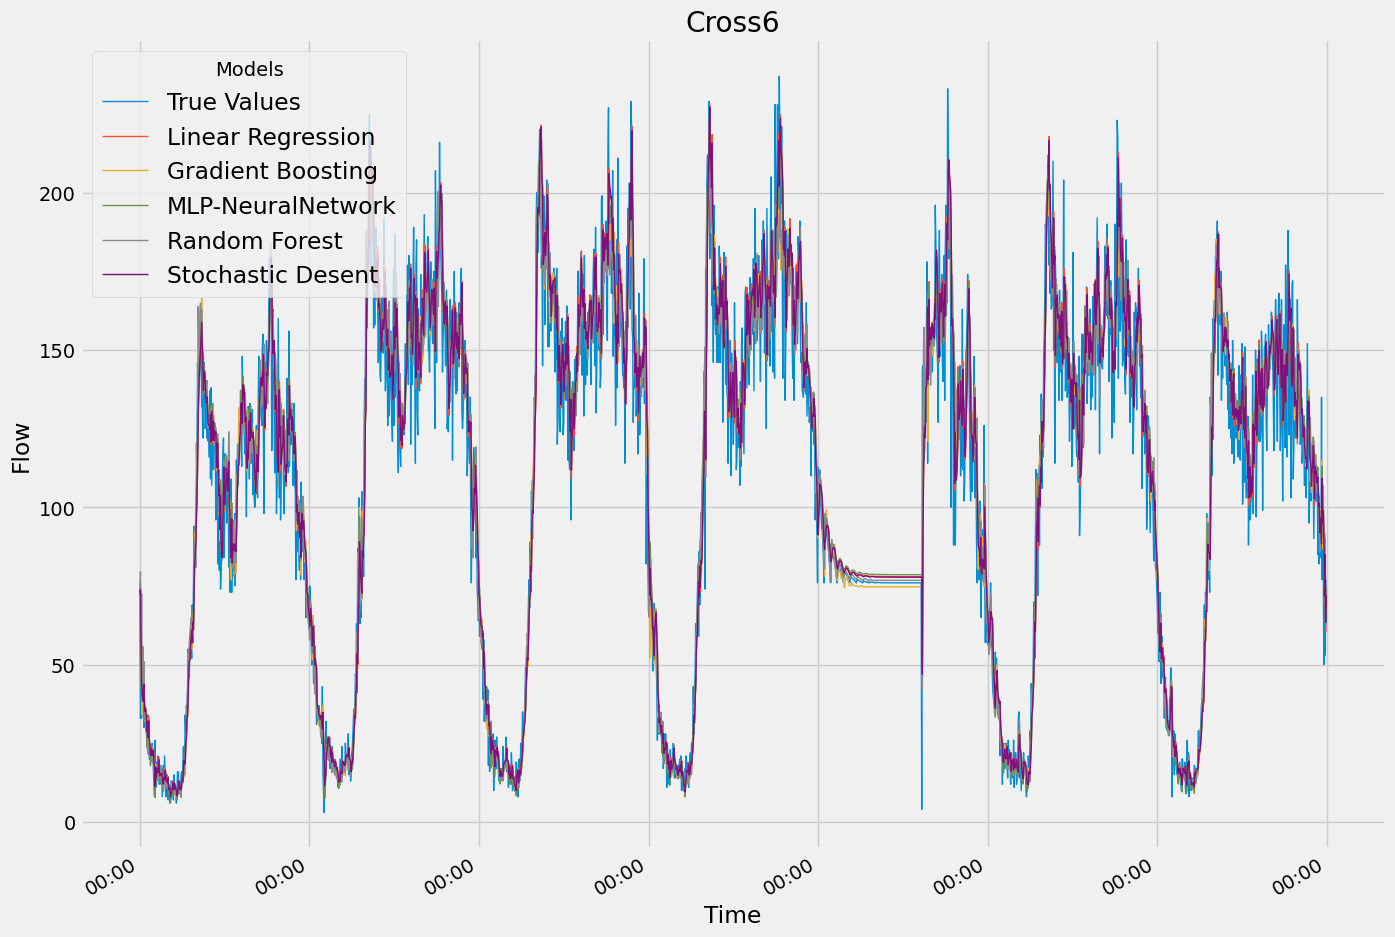

,Model_Name,MAE,MSE,R-Square,EV Score
0,Random Forest,12.514229,295.299064,0.910784,0.912202
1,Gradient Boosting,12.574463,295.666364,0.910673,0.912117
2,MLP-NeuralNetwork,12.799754,305.436269,0.907721,0.910072
3,Stochastic Desent,12.949543,317.790562,0.903989,0.906255
4,Linear Regression,13.081342,324.187515,0.902056,0.904709


In [ ]:
train6,test6 = create_cross_data(df,'Cross6')
algorithmsApply(train6,test6,'Cross6',7)